
<h2 style="color:blue" align="center"> MINI-PROJECT ON DISEASE OUT-BREAK IN NIGERIA </h2>

### Aim and Objective:
#### To determine the correlation between the disease cases and it effects based on states, settlements, gender, and age groups amongst others.


## Problem Statement

1. Comparing different diseases againt age groups? If Children or Adults are more affected based on a particular diseases.
2. Which disease is the most prevalent against settlements? 
3. Mortality rate between genders.
4. Mortality rate btween rural and urban settlements 
5. Based on the diseases is there any trends to show if any deadly disease like Ebola can still surface in future.
6. Based on the diseases, is there any trends to show if any deadly disease like Malaria can still surface in the future
7. Is there any correlation between the columns that will predict if age can have high rate of contacting a particular disease. 
8. Disease more predominate in both male and female gender.
9. Disease more prevelant in different states.
10. To check state with the highest disease outbreak
    Health status and year
11. Which particular state is mostly affected based on malaria?

In [1]:
#Importing all the libraries and modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
#Importing the dataset
meni_data1 = pd.read_csv('meningitis_dataset (1).csv')
meni_data1

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1.0,1.0
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0.0,1.0
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0.0,1.0
3,4,Sowore,Mooslemat,Ifedayo,Female,0,1,Ondo,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0.0,1.0
4,5,Abdusalam,Yusuf,Okafor,Male,1,0,Oyo,Urban,0,...,0,0,1,Alive,1,0,Confirmed,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93802,95527,Zamani,Paulina,Adetorera,Female,0,1,Rivers,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0.0,1.0
93803,95528,Vincent,Kagara,Okonkwo,Male,1,0,Jigawa,Rural,1,...,0,0,1,Alive,1,0,Not Confirmed,1,0.0,1.0
93804,95529,Bakare,Debby,Victoria,Female,0,1,Ondo,Urban,0,...,0,0,1,Alive,1,0,Not Confirmed,1,0.0,1.0
93805,95530,Bamidele,John,Attah,Male,1,0,Katsina,Rural,1,...,0,0,1,Alive,1,0,Confirmed,0,1.0,1.0


In [3]:
#Droping unneccesary columns for our EDA and modeling
data = meni_data1.drop(['id','surname','firstname','middlename','age_str','date_of_birth','meningitis','ebola','marburg_virus','serotype','yellow_fever','rubella_mars','malaria','cholera','diarrhoea','null_serotype','measles','viral_haemmorrhaphic_fever','NmA','NmC','NmW','alive','dead'], axis = 'columns')
data

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed
0,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,0,1,Cholera,alive,confirmed,0,1.0
1,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,0,1,Marburg Virus,Alive,Confirmed,1,0.0
2,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,0,1,Marburg Virus,Dead,Not Confirmed,1,0.0
3,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,0,1,Measles,Alive,Not Confirmed,1,0.0
4,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,1,0,Rubella Mars,Alive,Confirmed,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93802,Female,0,1,Rivers,Urban,0,1,2017-03-20,2017,4,1,0,Ebola,Dead,Not Confirmed,1,0.0
93803,Male,1,0,Jigawa,Rural,1,0,2017-12-05,2017,73,0,1,Rubella Mars,Alive,Not Confirmed,1,0.0
93804,Female,0,1,Ondo,Urban,0,1,2011-09-16,2011,24,0,1,Yellow Fever,Alive,Not Confirmed,1,0.0
93805,Male,1,0,Katsina,Rural,1,0,2009-08-05,2009,24,0,1,Diarrhoea,Alive,Confirmed,0,1.0


In [4]:
#Checking the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93807 entries, 0 to 93806
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            93807 non-null  object 
 1   gender_male       93807 non-null  int64  
 2   gender_female     93807 non-null  int64  
 3   state             93807 non-null  object 
 4   settlement        93807 non-null  object 
 5   rural_settlement  93807 non-null  int64  
 6   urban_settlement  93807 non-null  int64  
 7   report_date       93807 non-null  object 
 8   report_year       93807 non-null  int64  
 9   age               93807 non-null  int64  
 10  child_group       93807 non-null  int64  
 11  adult_group       93807 non-null  int64  
 12  disease           93807 non-null  object 
 13  health_status     93807 non-null  object 
 14  report_outcome    93807 non-null  object 
 15  unconfirmed       93807 non-null  int64  
 16  confirmed         93806 non-null  float6

## Data Cleaning 

In [5]:
#shape of the dataset
data.shape

(93807, 17)

In [6]:
#Checking the missing values 
data.isnull().sum()

gender              0
gender_male         0
gender_female       0
state               0
settlement          0
rural_settlement    0
urban_settlement    0
report_date         0
report_year         0
age                 0
child_group         0
adult_group         0
disease             0
health_status       0
report_outcome      0
unconfirmed         0
confirmed           1
dtype: int64

In [7]:
#Describing the data to get the statistics of the dataset
data.describe()

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,unconfirmed,confirmed
count,93807.000000,93807.000000,93807.000000,93807.000000,93807.000000,93807.000000,93807.000000,93807.000000,93807.000000,93806.000000
mean,0.482576,0.517424,0.503353,0.496647,2013.515388,34.766510,0.291588,0.708412,0.749336,0.250666
std,0.499699,0.499699,0.499991,0.499991,2.873372,22.263557,0.454496,0.454496,0.433397,0.433399
min,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2011.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,2014.000000,34.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2016.000000,54.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,2018.000000,78.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Checking for duplicate value
data.duplicated(keep = 'first')

0        False
1        False
2        False
3        False
4        False
         ...  
93802    False
93803    False
93804    False
93805    False
93806    False
Length: 93807, dtype: bool

In [9]:
meni_data1[['report_date']]

,report_date
0,2018-05-15
1,2017-02-28
2,2012-03-02
3,2010-05-21
4,2017-08-28
...,...
93802,2017-03-20
93803,2017-12-05
93804,2011-09-16
93805,2009-08-05


In [10]:
# checking for the amount of cases in each disease group
data[['disease']].value_counts()

disease                   
Marburg Virus                 9543
Malaria                       9452
Yellow Fever                  9407
Cholera                       9385
Diarrhoea                     9383
Measles                       9375
Viral Haemmorrhaphic Fever    9368
Ebola                         9330
Rubella Mars                  9326
Meningitis                    9238
dtype: int64

In [11]:
# checking for numbers of cases with respect to gender(female and male)
g_disease = data.groupby('gender')[['disease']].value_counts().sort_values(ascending = False).head(30)
g_disease


gender  disease                   
Female  Measles                       4940
        Marburg Virus                 4902
        Yellow Fever                  4897
        Rubella Mars                  4853
        Malaria                       4847
        Meningitis                    4837
        Viral Haemmorrhaphic Fever    4834
        Diarrhoea                     4830
        Cholera                       4821
        Ebola                         4777
Male    Marburg Virus                 4641
        Malaria                       4605
        Cholera                       4564
        Ebola                         4553
        Diarrhoea                     4553
        Viral Haemmorrhaphic Fever    4534
        Yellow Fever                  4510
        Rubella Mars                  4473
        Measles                       4435
        Meningitis                    4401
dtype: int64

In [12]:
# summary of cases(disease) with respect to gender(female and male)
gender_d =data.groupby("gender")["disease"].value_counts().unstack().fillna(0)
gender_d

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
gender,,,,,,,,,,
Female,4821,4830,4777,4847,4902,4940,4837,4853,4834,4897
Male,4564,4553,4553,4605,4641,4435,4401,4473,4534,4510


In [13]:
#percentage of the male and female genders 
percent_gender = data['gender'].value_counts(normalize = True)
percent_gender.round(2)

Female    0.52
Male      0.48
Name: gender, dtype: float64

The total percentge of Female is 52% and male is 48%

In [14]:
#counts of gender
data.gender.value_counts()

Female    48538
Male      45269
Name: gender, dtype: int64

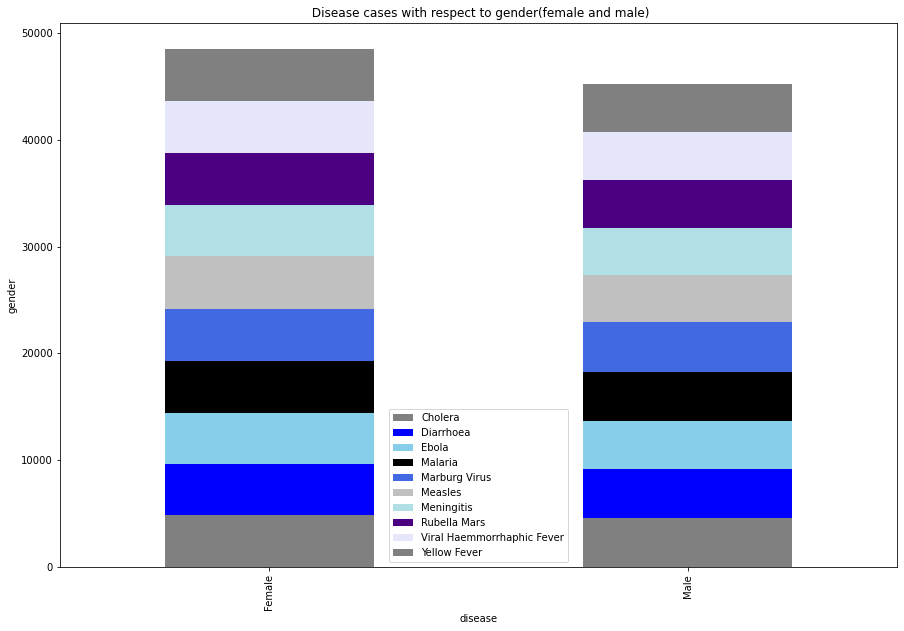

In [15]:
# visualization of cases with respect to gender(female and male)
gender_d.plot(kind ='bar', xlabel = 'disease', ylabel = 'gender',
              title = ' Disease cases with respect to gender(female and male)',
              figsize =(15,10), stacked = True, color = ['grey', 'blue', 'skyblue', 'k', 'royalblue', 'silver',
                                                     'powderblue', "indigo", "lavender"])
plt.legend();

 Females have more numbers of disease cases than males but melease is more predominant in the female with the case 4940 while for male marburg virus is more predominate with a case of 4641
 From the dataset provided, it is shown that females have more population than males and also have more distribution of diseases. However, we cannot ascertain that females are mostly affected by the diseases because the dataset is not showing the equal distribution of population among the genders.
 

###  1. Comparing different diseases againt age groups? If Children or Adults are more affected based on a particular diseases.

In [16]:
# disease base on all age group (unstacking)
gender_da =data.groupby("age")["disease"].value_counts().unstack().fillna(0)
gender_da.head(10)

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
age,,,,,,,,,,
0,4,1,4,1,1,2,2,6,5,3
1,130,113,134,131,148,149,156,137,109,151
2,248,252,245,247,260,259,245,238,254,252
3,256,249,225,234,214,226,228,224,225,247
4,232,227,222,191,227,230,218,224,223,227
5,225,222,204,219,211,207,178,218,203,224
6,195,208,173,189,188,195,178,206,178,187
7,201,164,181,174,173,153,182,174,196,171
8,164,172,179,158,164,159,151,185,170,178


In [17]:
disease_age = data.groupby(['child_group','adult_group'])['disease'].value_counts().sort_values(ascending = False)
disease_age

child_group  adult_group  disease                   
0            1            Marburg Virus                 6819
                          Malaria                       6774
                          Measles                       6653
                          Viral Haemmorrhaphic Fever    6648
                          Yellow Fever                  6640
                          Diarrhoea                     6621
                          Cholera                       6616
                          Ebola                         6596
                          Meningitis                    6554
                          Rubella Mars                  6533
1            0            Rubella Mars                  2793
                          Cholera                       2769
                          Yellow Fever                  2767
                          Diarrhoea                     2762
                          Ebola                         2734
                          Marbur

<AxesSubplot:xlabel='disease', ylabel='count'>

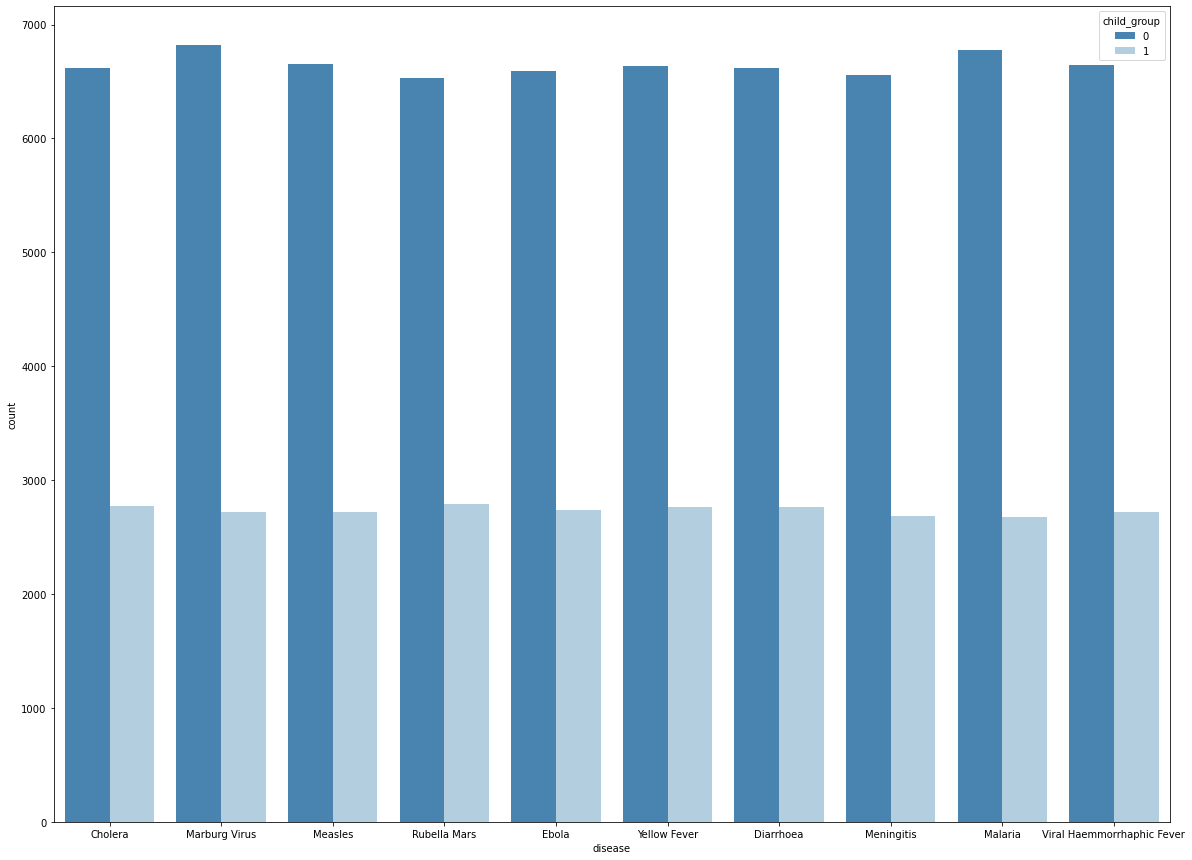

In [18]:
#Let's visualize the columns by plotting the charts
plt.figure(figsize =(20, 15))
sns.countplot(x = 'disease', hue = 'child_group', data = data, palette = 'Blues_r')

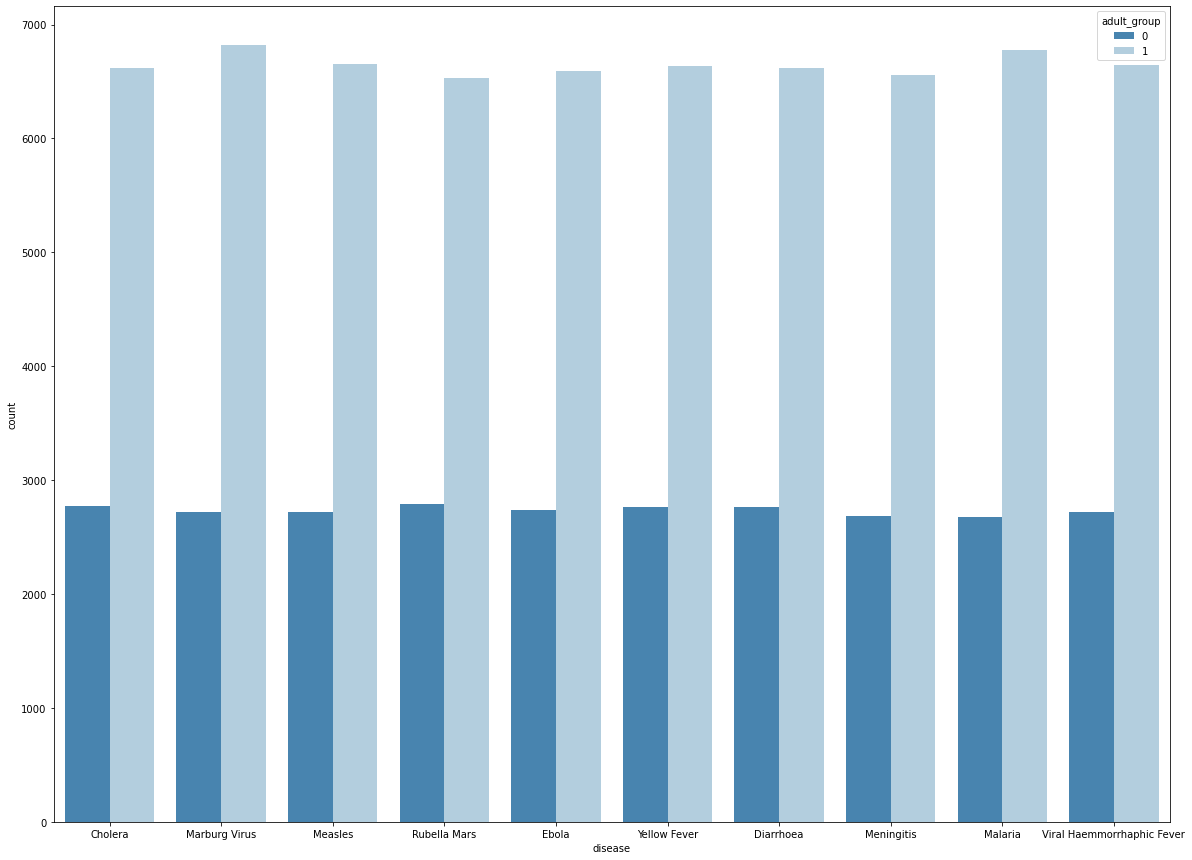

In [19]:
#Let's visualize the columns by plotting the charts
plt.figure(figsize =(20, 15))
sns.countplot(x = 'disease', hue = 'adult_group', data = data, palette = 'Blues_r');



The two charts above shows that the adult group is more affected across the various diseases and 
they are mostly affected by malaria with counts of 20,316 adults who were affected by malaria, followed by 20,283 affected 
by measles and 20,229 affected by cholera.

### 2.  Which disease is the most prevalent against settlements?

In [20]:
# disease prevailant in both urban and rural setllements 
settle_d =data.groupby("settlement")["disease"].value_counts().unstack().fillna(0)
settle_d

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
settlement,,,,,,,,,,
Rural,4725,4734,4706,4684,4829,4652,4693,4727,4721,4747
Urban,4660,4649,4624,4768,4714,4723,4545,4599,4647,4660


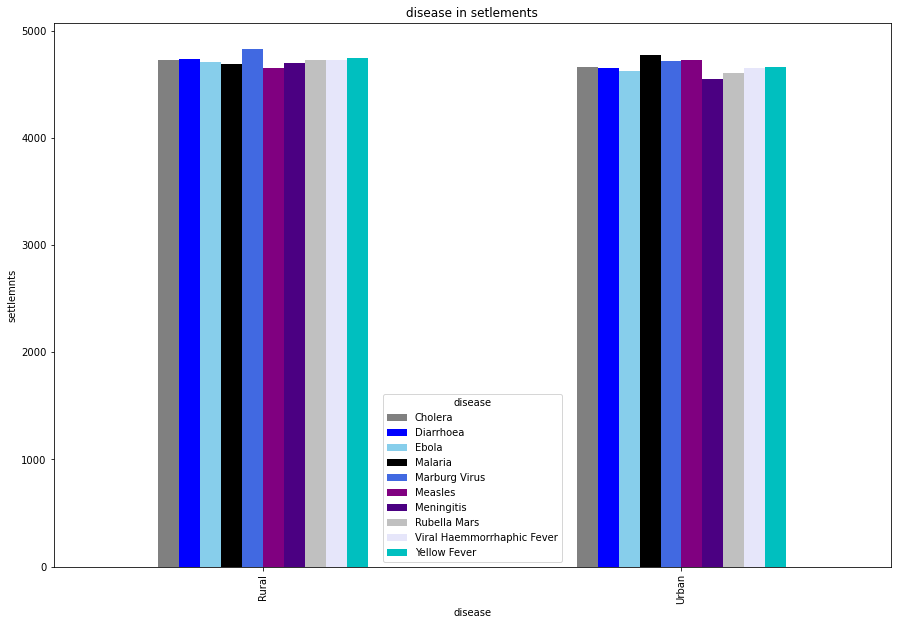

In [21]:
# visualization of disease prevailant in both urban and rural setllements 
plot = settle_d.plot.bar(figsize =(15,10), color = ['grey', 'blue', 'skyblue', 'k', 'royalblue', 'purple', 'indigo', 'silver',
                                                    'lavender', 'c'])
plt.xlabel('disease')
plt.ylabel('settlemnts')
plt.title('disease in setlements')
plt.show();

For urban settlement we have more case of malaria with a recorded case of 4768. While for Rural settlement we have marburg virus with a prevalent case of 4829.From the visualization of the dataset, it depicts that the diseases have no significant effects based on their settlements. That is to say that irrespective of your settlement whether rural or urban there's little or equal chances of being infected by the diseases.

### 3.Mortality rate between genders

In [22]:
#Replacing 'alive' row to 'Alive'
data['health_status'] =data['health_status'].str.replace ("alive", "Alive")
data['health_status'].unique()
    

array(['Alive', 'Dead'], dtype=object)

In [23]:
#Value counts of genders against health status
Morta_gen = data.groupby('gender')['health_status'].value_counts()
Morta_gen

gender  health_status
Female  Alive            24366
        Dead             24172
Male    Dead             22705
        Alive            22564
Name: health_status, dtype: int64

Text(0.5, 1.0, 'Mortality range against gender')

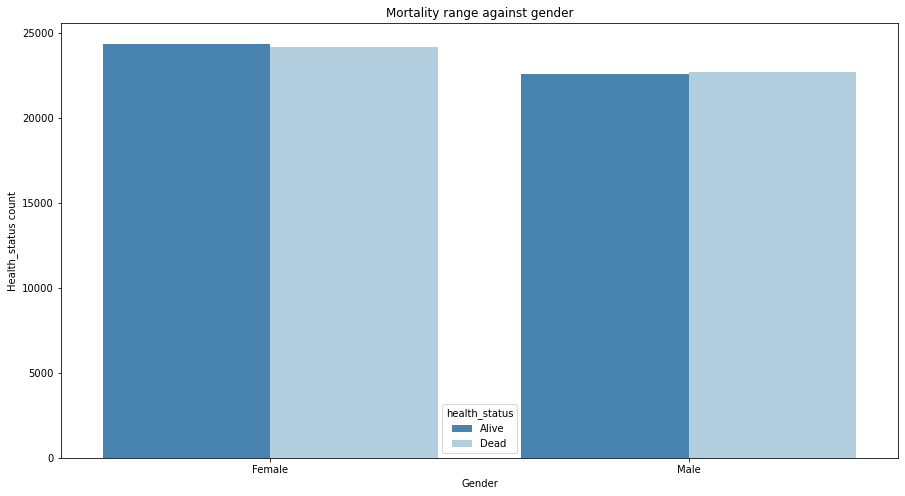

In [24]:
#Visualizing the results of the two columns
plt.figure(figsize=(15, 8))
sns.countplot(x = 'gender', hue ='health_status', data = data, palette = 'Blues_r')
plt.xlabel('Gender')
plt.ylabel('Health_status count')
plt.title('Mortality range against gender')

The chart shows that females that were dead are more than males that died. There's is a higher population of female on this dataset and alive females are slightly lower than the dead ones with 448 difference between alive and dead. 

### 4.Mortality rate btween rural and urban settlements

In [25]:
Morta_settlement = pd.crosstab(data['settlement'], data['health_status'], normalize = True)
Morta_settlement

health_status,Alive,Dead
settlement,,
Rural,0.250887,0.252465
Urban,0.249395,0.247252


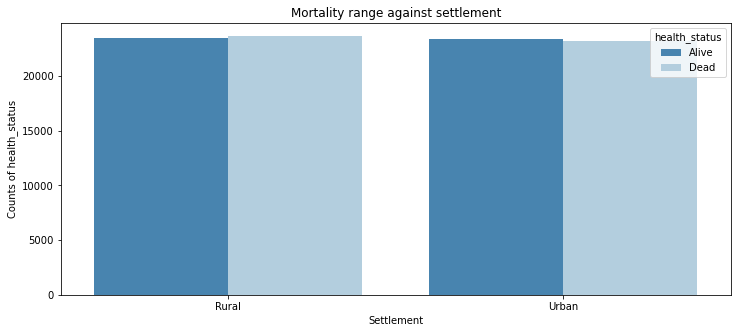

In [26]:
plt.figure(figsize =(12, 5))
sns.countplot(x = 'settlement', data =data, hue = 'health_status', palette = 'Blues_r')
plt.xlabel('Settlement')
plt.ylabel('Counts of health_status')
plt.title('Mortality range against settlement');

The chart above shows that there's slight higher mortality rate in rural settlements than in urban settlement which could be because of lack of basic health facilities and shortage of medical practitioners.  

Recommedation: We recommend that more public workers should be sent to rural settlements.

### 5. Disease across different years

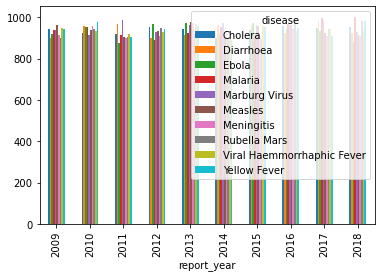

<Figure size 1080x576 with 0 Axes>

In [27]:
#Using crosstab to visualize different diseases across the years 
pd.crosstab(data.report_year, data.disease).plot(kind='bar'),
plt.figure(figsize=(15,8));


There's no year that had significant drop in the disease's breakout. This shows if nothing is done to avert or reduce the effect of the diseases on the citizens, we will continue to have increase in death rate.

### 6. Based on the diseases, is there any trends to show if any deadly disease like Malaria can still surface in the future.¶

In [28]:
#Subsetting disease column to extract malaria
dis_malaria = data[data['disease'] == 'Malaria']
dis_malaria.head()

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed
19,Female,0,1,Adamawa,Rural,1,0,2017-09-23,2017,39,0,1,Malaria,Alive,Not Confirmed,1,0.0
21,Female,0,1,Rivers,Urban,0,1,2011-02-13,2011,14,1,0,Malaria,Alive,Confirmed,0,1.0
37,Female,0,1,Kaduna,Rural,1,0,2010-04-02,2010,66,0,1,Malaria,Dead,Confirmed,0,1.0
38,Male,1,0,Jigawa,Urban,0,1,2017-07-05,2017,8,1,0,Malaria,Alive,Not Confirmed,1,0.0
40,Female,0,1,Oyo,Urban,0,1,2011-01-22,2011,17,1,0,Malaria,Alive,Confirmed,0,1.0


In [29]:
dis_malaria['report_year'].unique()

array([2017, 2011, 2010, 2014, 2009, 2015, 2013, 2018, 2012, 2016],
      dtype=int64)

In [30]:
dis_malaria['report_year'].value_counts().sort_values(ascending = False)

2018    1002
2017     995
2016     969
2010     953
2014     952
2009     940
2013     926
2011     913
2015     912
2012     890
Name: report_year, dtype: int64

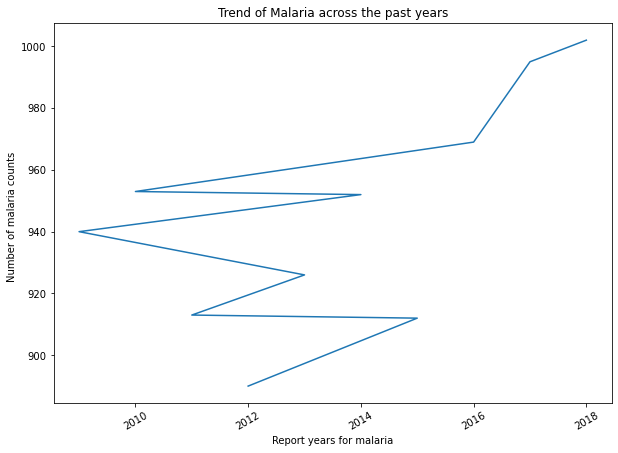

In [31]:
plt.figure(figsize =(10, 7))
dis_malaria['report_year'].value_counts().sort_values(ascending = False).plot()
plt.xticks(rotation = 30)
plt.xlabel('Report years for malaria')
plt.ylabel('Number of malaria counts  ')
plt.title('Trend of Malaria across the past years')
plt.show()

From the line chart above it shows that in 2009 there's high increase in malaria, which reduce drastically in 2011, however, there's a sudden rise in 2015 till 2018. This graph has shown that there will be countinous rise of malaria cases.

Recommendation: Government should sensitize the public about the seasons when mosquitoes are higher. There should be funding on more research on seasons where malaria will be on the rise.  

### 7. Occurance rate of malaria based on settlement. Does malaria affect the rurul settlement more than the urban settlement?


In [32]:
#Checking for counts of settlement
malaria_set = dis_malaria['settlement'].value_counts()
malaria_set

Urban    4768
Rural    4684
Name: settlement, dtype: int64

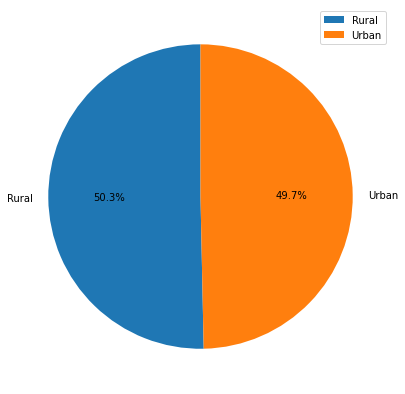

In [33]:
#Plotting the graph to see the percentage of urban and rural settlement
plt.figure(figsize =(10, 7))
plt.pie(data['settlement'].value_counts(), labels = data['settlement'].value_counts().index,
       startangle = 90,
       autopct = '%1.1f%%')
plt.legend()
plt.show()

### 8.Based on the diseases, is there any trends to show if any deadly disease like Ebola can still surface in the future.¶

In [34]:
#Subsetting disease column to extract ebola
dis_ebola = data[data['disease'] == 'Ebola']
dis_ebola.head()

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed
5,Female,0,1,Kaduna,Rural,1,0,2012-06-27,2012,44,0,1,Ebola,Alive,Confirmed,1,0.0
13,Male,1,0,Nasarawa,Rural,1,0,2016-11-19,2016,3,1,0,Ebola,Alive,Not Confirmed,1,0.0
35,Female,0,1,Katsina,Urban,0,1,2014-01-06,2014,27,0,1,Ebola,Alive,Confirmed,1,0.0
48,Male,1,0,Katsina,Urban,0,1,2018-04-20,2018,66,0,1,Ebola,Alive,Not Confirmed,1,0.0
84,Female,0,1,Jigawa,Rural,1,0,2011-11-04,2011,24,0,1,Ebola,Dead,Confirmed,1,0.0


In [35]:
dis_ebola['report_year'].unique()

array([2012, 2016, 2014, 2018, 2011, 2017, 2015, 2009, 2013, 2010],
      dtype=int64)

In [36]:
dis_ebola['report_year'].value_counts().sort_values(ascending = False)

2015    972
2013    971
2012    969
2010    954
2016    942
2017    932
2009    919
2014    915
2018    881
2011    875
Name: report_year, dtype: int64

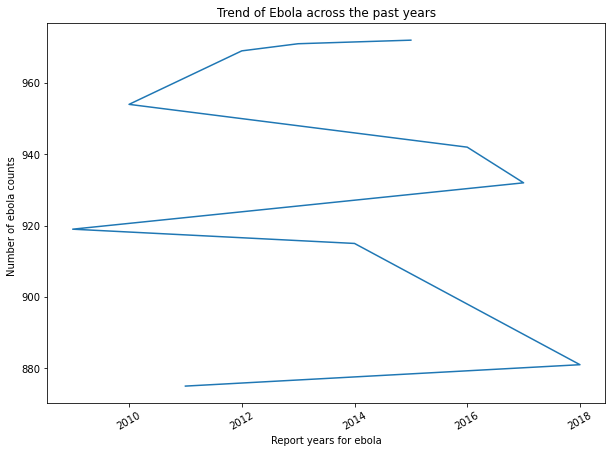

In [37]:
plt.figure(figsize =(10, 7))
dis_ebola['report_year'].value_counts().sort_values(ascending = False).plot()
plt.xticks(rotation = 30)
plt.xlabel('Report years for ebola')
plt.ylabel('Number of ebola counts  ')
plt.title('Trend of Ebola across the past years')
plt.show()

### 9. Is there any correlation between the columns that will predict if age can have high rate of contacting a particular disease

In [38]:
#correlation table
corr_dis = data.corr()
corr_dis

,gender_male,gender_female,rural_settlement,urban_settlement,report_year,age,child_group,adult_group,unconfirmed,confirmed
gender_male,1.000000,-1.000000,-0.001206,0.001206,0.003437,0.000500,-0.000230,0.000230,0.003952,-0.003946
gender_female,-1.000000,1.000000,0.001206,-0.001206,-0.003437,-0.000500,0.000230,-0.000230,-0.003952,0.003946
rural_settlement,-0.001206,0.001206,1.000000,-1.000000,-0.005095,0.003776,-0.000995,0.000995,0.001320,-0.001314
urban_settlement,0.001206,-0.001206,-1.000000,1.000000,0.005095,-0.003776,0.000995,-0.000995,-0.001320,0.001314
report_year,0.003437,-0.003437,-0.005095,0.005095,1.000000,0.109491,-0.076449,0.076449,0.002207,-0.002217
age,0.000500,-0.000500,0.003776,-0.003776,0.109491,1.000000,-0.773713,0.773713,0.006058,-0.006056
child_group,-0.000230,0.000230,-0.000995,0.000995,-0.076449,-0.773713,1.000000,-1.000000,-0.004578,0.004574
adult_group,0.000230,-0.000230,0.000995,-0.000995,0.076449,0.773713,-1.000000,1.000000,0.004578,-0.004574
unconfirmed,0.003952,-0.003952,0.001320,-0.001320,0.002207,0.006058,-0.004578,0.004578,1.000000,-1.000000
confirmed,-0.003946,0.003946,-0.001314,0.001314,-0.002217,-0.006056,0.004574,-0.004574,-1.000000,1.000000


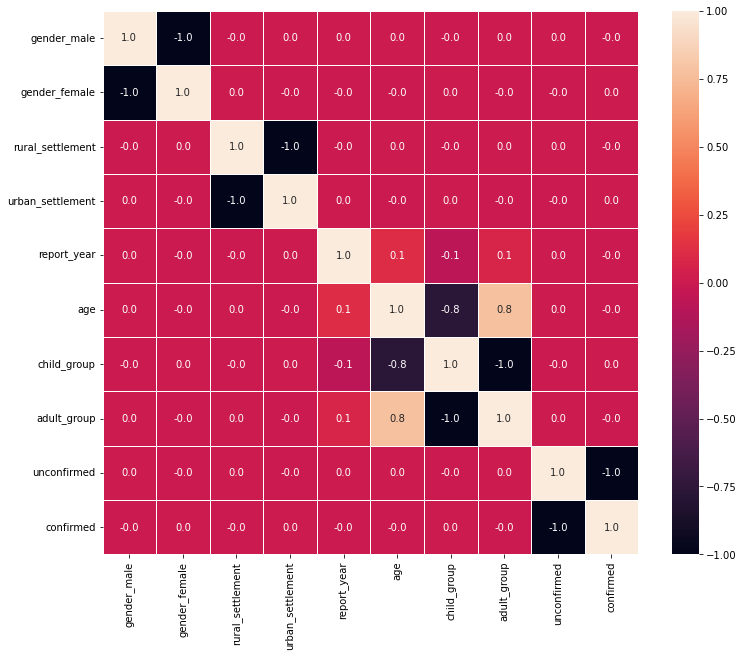

In [39]:
#Using heatmap to visualize the correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_dis, annot = True,linewidths=.5, fmt= '.1f')
plt.show()

### 10.Mortality rate against age groups ? Trying to know which age groups are more affected by the diseases

In [40]:
#Creating new columns for the age groups
data['Age_group']= ['Baby'if i <5 else'Child'if i < 13 else "Teenager" if i < 20 else 'YoungAdult' if i< 35 else 'Adult' if i< 55 else 'Elder'for i in data.age]
data.head()

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed,Age_group
0,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,0,1,Cholera,Alive,confirmed,0,1.0,YoungAdult
1,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,0,1,Marburg Virus,Alive,Confirmed,1,0.0,YoungAdult
2,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,0,1,Marburg Virus,Dead,Not Confirmed,1,0.0,YoungAdult
3,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,0,1,Measles,Alive,Not Confirmed,1,0.0,Elder
4,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,1,0,Rubella Mars,Alive,Confirmed,1,0.0,Child


In [41]:
#Checking the percentage of the age groups
data.Age_group.value_counts(normalize = True).round(2)

Adult         0.25
Elder         0.24
YoungAdult    0.19
Child         0.14
Baby          0.09
Teenager      0.09
Name: Age_group, dtype: float64

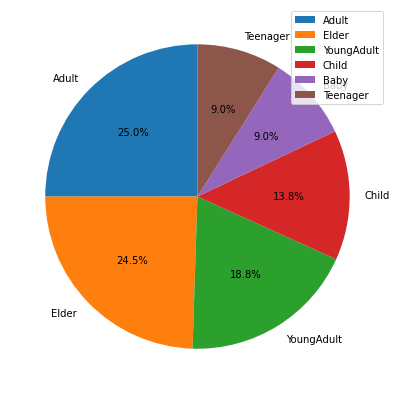

In [42]:
#Using pie chart to see the percentage of the age groups
plt.figure(figsize =(10, 7))
plt.pie(data['Age_group'].value_counts(), labels = data['Age_group'].value_counts().index,
       startangle = 90,
       autopct = '%1.1f%%')
plt.legend()
plt.show()

In [43]:
age_dis = data.groupby(['Age_group'])['disease'].value_counts().unstack()
age_dis

disease,Cholera,Diarrhoea,Ebola,Malaria,Marburg Virus,Measles,Meningitis,Rubella Mars,Viral Haemmorrhaphic Fever,Yellow Fever
Age_group,,,,,,,,,,
Adult,2276,2308,2255,2384,2458,2367,2338,2353,2325,2394
Baby,870,842,830,804,850,866,849,829,816,880
Child,1317,1339,1308,1283,1274,1259,1226,1342,1299,1306
Elder,2311,2313,2315,2310,2338,2287,2291,2210,2352,2239
Teenager,814,848,838,835,852,837,829,878,870,798
YoungAdult,1797,1733,1784,1836,1771,1759,1705,1714,1706,1790


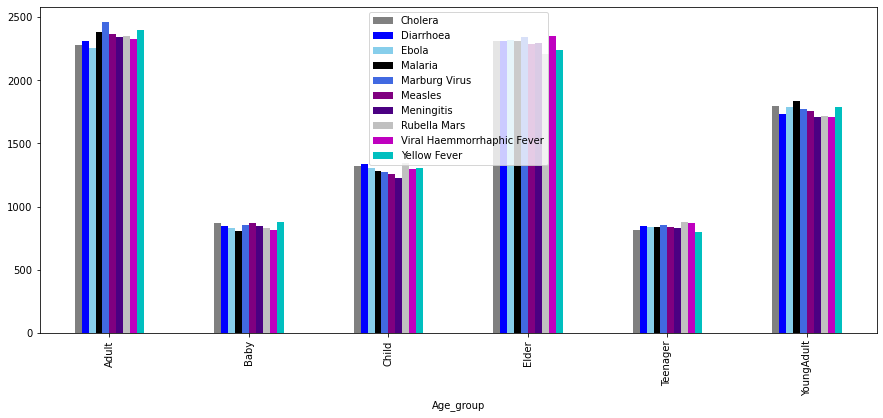

In [44]:
#Using bar plt to visualize different age groups and diseases 
plot = age_dis.plot.bar(figsize=(15, 6),color= ['grey', 'blue', 'skyblue', 'k', 'royalblue',
                                                 'purple', 'indigo', 'silver',
                                                    'm', 'c'])
plt.legend();

From the chart above, it depicts that the adult group from 35- 54 years have higher chances of contacting these diseases followed by Elder from 55 and above while young adult from 20- 35 mostly Teenager from 13 - 19 have lesser chances of contacting these disease. This deducts that Teengers have stronger immunity to resist the diseases from constant occurance. 

### 11. Mortality rate against age groups 

In [45]:
#Mortality rate against age groups 
age_m =data.groupby("Age_group")["health_status"].value_counts().unstack().fillna(0)
age_m

health_status,Alive,Dead
Age_group,,
Adult,11831,11627
Baby,4245,4191
Child,6431,6522
Elder,11410,11556
Teenager,4163,4236
YoungAdult,8850,8745


<AxesSubplot:xlabel='Age_group', ylabel='count'>

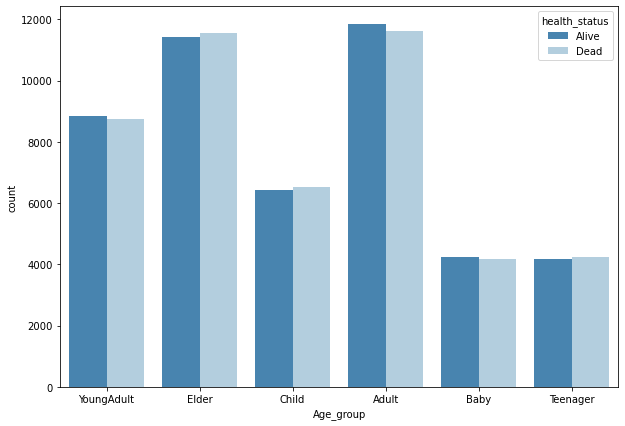

In [46]:
#Visualizing the age grpups and mortality rate
plt.figure(figsize =(10, 7))
sns.countplot(x = 'Age_group', hue = 'health_status', data = data, palette = 'Blues_r')

Looking at the previous visualization we made on age groups against diseases, we saw that the diseases affected the adult group more that others, proceeding to this visualization here, you notice that Adult group are more prone to the effect of these diseases leading to higher mortaity rate on their age group

### 12. Using Multi-variate analysis to visualize which state and in what year do we have more death?

In [47]:
#Subsetting for only dead
dead_status = meni_data1[meni_data1['health_status']== 'dead']
dead_status

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype


In [48]:
#Selecting columns to perform a multi-variate analysis
state_mortality = data[['state', 'report_year','health_status']].value_counts(ascending = False).head(10)
state_mortality 


state      report_year  health_status
Niger      2013         Alive            167
Akwa Ibom  2017         Alive            156
Kano       2014         Alive            155
Plateau    2012         Dead             155
Abia       2009         Alive            154
Plateau    2016         Dead             154
Imo        2010         Alive            154
Yobe       2018         Dead             153
Niger      2010         Dead             153
Kaduna     2012         Dead             152
dtype: int64

<AxesSubplot:xlabel='state,report_year,health_status'>

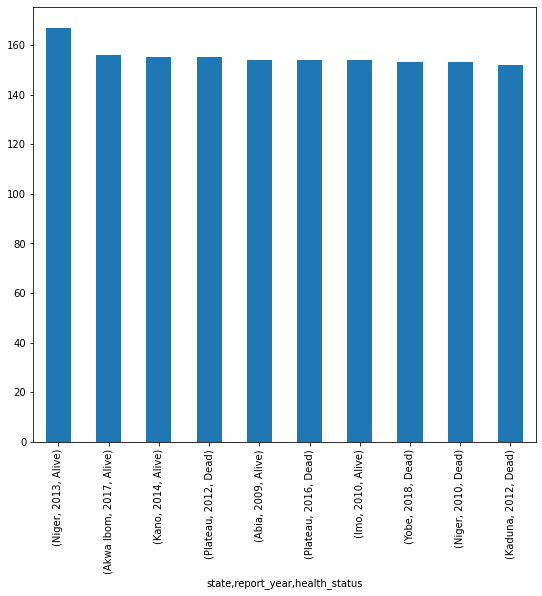

In [49]:
state_mortality.plot(x="health_status", y=["report_year", "state"], kind="bar", figsize=(9, 8))
 

In 2010 in FCT, there were 447 recorded death cases which is slightly higher than Bayelsa and Taraba.

### 13. Disease more prevalant in different states.

In [50]:
#Using group by to see the diseases in different states

dis_state = data.groupby('state')['disease'].value_counts(ascending = False).to_frame()
dis_state.sample(36).head(36)

,,disease
state,disease,
Adamawa,Cholera,272
Kebbi,Rubella Mars,254
Enugu,Cholera,262
Gombe,Diarrhoea,251
Niger,Marburg Virus,247
Adamawa,Ebola,249
Enugu,Diarrhoea,264
Benue,Ebola,248
Federal Capital Territory,Meningitis,249


<AxesSubplot:xlabel='state,disease'>

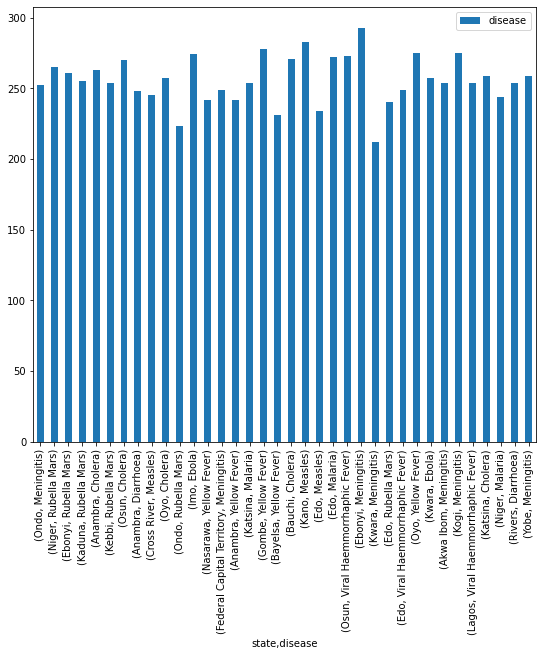

In [51]:
#Visualizing the top 5 states that are more prevalant to diseases
dis_state.sample(36).head(36).plot( kind="bar", figsize=(9, 8))


From the chart measles are more prevalant in Kwara state, viral haemmorhaphic fever and cholera are more in Niger state, Rubella Mars are more in Osun and viral haemmorhaphic fever are also more prevalant in Yobe state.

### 14. Which particular state is mostly affected based on malaria?

In [52]:
# subsetting to get dataset with malaria disease only
malaria = data[data.disease == 'Malaria']
malaria.head(3)

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed,Age_group
19,Female,0,1,Adamawa,Rural,1,0,2017-09-23,2017,39,0,1,Malaria,Alive,Not Confirmed,1,0.0,Adult
21,Female,0,1,Rivers,Urban,0,1,2011-02-13,2011,14,1,0,Malaria,Alive,Confirmed,0,1.0,Teenager
37,Female,0,1,Kaduna,Rural,1,0,2010-04-02,2010,66,0,1,Malaria,Dead,Confirmed,0,1.0,Elder


In [53]:
states_malaria = malaria.groupby('state')['disease'].value_counts().sort_values(ascending = False).head(5)
states_malaria = pd.DataFrame(states_malaria)
states_malaria.columns = ['disease count']
states_malaria

,,disease count
state,disease,
Kwara,Malaria,301
Jigawa,Malaria,292
Ogun,Malaria,273
Edo,Malaria,272
Benue,Malaria,270


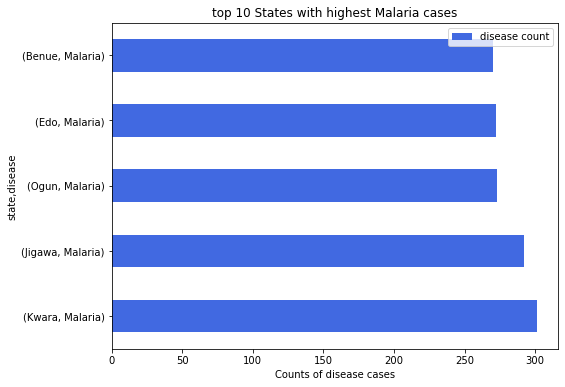

In [54]:
plot = states_malaria.plot.barh(figsize =(8,6),color='royalblue')
plt.xlabel('Counts of disease cases')
#plt.ylabel('state')
plt.title('top 10 States with highest Malaria cases')
plt.show();



From the chart above, there's a high record of malaria cases in Kano and Kwara states(833 cases recorded). 

Recommendation: As malaria was the most common disease in kwara and kano, it's recommend that government should;

Educate the masses and parents on malaria, it's danger and when to seek medical assistance.

A health campaign should be held to educate them on the proper use of mosquito net, adequate sanitation, proper human waste disposal. Government should create a sewage channel to avoid stagnant water in the states. 

### 15. Using multi_variate analysis to check state with the highest disease outbreak, Health status and year

In [55]:
#Using multi_variate analysis
distate_healthyear = data.groupby(['state', 'disease', 'report_year'])['health_status'].value_counts()
distate_healthyear

state    disease       report_year  health_status
Abia     Cholera       2009         Alive            14
                                    Dead             13
                       2010         Dead             16
                                    Alive            11
                       2011         Dead             17
                                                     ..
Zamfara  Yellow Fever  2016         Dead             10
                       2017         Alive            13
                                    Dead             10
                       2018         Alive            17
                                    Dead             13
Name: health_status, Length: 7400, dtype: int64

<AxesSubplot:ylabel='state,disease,report_year,health_status'>

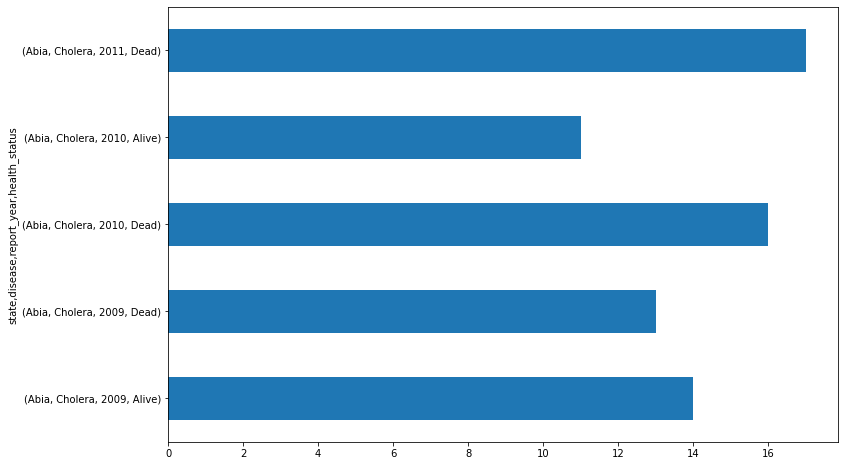

In [56]:
distate_healthyear.head().plot(kind = 'barh', figsize = (12, 8))

In [57]:
data['Age_group']= ['Baby'if i <5 else'Child'if i < 13 else "Teenager" if i < 20 else 'YoungAdult' if i< 35 else 'Adult' if i< 55 else 'Elder'for i in data.age]
data.head()

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed,Age_group
0,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,0,1,Cholera,Alive,confirmed,0,1.0,YoungAdult
1,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,0,1,Marburg Virus,Alive,Confirmed,1,0.0,YoungAdult
2,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,0,1,Marburg Virus,Dead,Not Confirmed,1,0.0,YoungAdult
3,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,0,1,Measles,Alive,Not Confirmed,1,0.0,Elder
4,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,1,0,Rubella Mars,Alive,Confirmed,1,0.0,Child


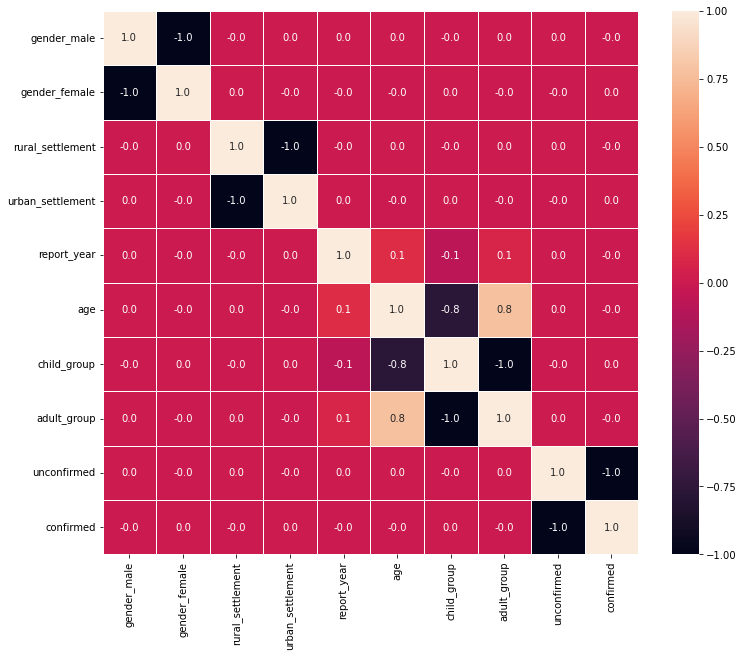

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_dis, annot = True,linewidths=.5, fmt= '.1f')
plt.show()

### MODELING OUR DATA

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#using label encoder to convert category columns to numerical values 
data.report_outcome = le.fit_transform(data.report_outcome.values)
data.Age_group = le.fit_transform(data.Age_group.values)
data.disease = le.fit_transform(data.disease.values)

In [60]:
data.head(3)

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed,Age_group
0,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,0,1,0,Alive,2,0,1.0,5
1,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,0,1,4,Alive,0,1,0.0,5
2,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,0,1,4,Dead,1,1,0.0,5


In [61]:
#Extracting the independent variable
x=data[['gender_male', 'gender_female', 'rural_settlement', 'urban_settlement', 'Age_group', 'disease']]
x.head(3)

,gender_male,gender_female,rural_settlement,urban_settlement,Age_group,disease
0,0,1,1,0,5,0
1,1,0,1,0,5,4
2,0,1,0,1,5,4


In [62]:
meni_data1.head(3)

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1.0,1.0
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0.0,1.0
2,3,Sanusi,Adaugo,Katerine,Female,0,1,Ogun,Urban,0,...,0,0,1,Dead,0,1,Not Confirmed,1,0.0,1.0


In [63]:
#Extracting the dependant variable
data["confirmed"] = meni_data1["confirmed"].fillna(1)
y = data[["confirmed"]]
y.fillna(1)

,confirmed
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
93802,0.0
93803,0.0
93804,0.0
93805,1.0


In [64]:
#Adding new column to the dataset
data['Age_group']= ['Baby'if i <5 else'Child'if i < 13 else "Teenager" if i < 20 else 'YoungAdult' if i< 35 else 'Adult' if i< 55 else 'Elder'for i in data.age]
data.head()

,gender,gender_male,gender_female,state,settlement,rural_settlement,urban_settlement,report_date,report_year,age,child_group,adult_group,disease,health_status,report_outcome,unconfirmed,confirmed,Age_group
0,Female,0,1,Rivers,Rural,1,0,2018-05-15,2018,32,0,1,0,Alive,2,0,1.0,YoungAdult
1,Male,1,0,Ebonyi,Rural,1,0,2017-02-28,2017,32,0,1,4,Alive,0,1,0.0,YoungAdult
2,Female,0,1,Ogun,Urban,0,1,2012-03-02,2012,24,0,1,4,Dead,1,1,0.0,YoungAdult
3,Female,0,1,Ondo,Rural,1,0,2010-05-21,2010,63,0,1,5,Alive,1,1,0.0,Elder
4,Male,1,0,Oyo,Urban,0,1,2017-08-28,2017,9,1,0,7,Alive,0,1,0.0,Child


In [65]:
y.isnull().sum()


confirmed    0
dtype: int64

### Using Logistic Regression Model

In [66]:
#importing the model
from sklearn.model_selection import train_test_split

In [67]:
##Calling the Object to build our model
model = LogisticRegression()
model

LogisticRegression()

In [68]:
#Splitting our dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 52)


In [69]:
len(x_train)

75045

In [70]:
len(x_test)

18762

In [71]:
 #Fitting the dataset for training 
reg_log =model.fit(x_train, y_train)

In [72]:
#Checking the performance of the model
model.score(x_test,y_test)

0.7477880822939985

In [73]:
y_pred= reg_log.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [87]:
d_pro =model.predict_proba(x_test)
d_pro

array([[0.68123562, 0.31876438],
       [0.68123562, 0.31876438],
       [0.68528782, 0.31471218],
       ...,
       [0.65584929, 0.34415071],
       [0.79292689, 0.20707311],
       [0.83804983, 0.16195017]])

In [88]:
y_pred = reg_log.predict([[1, 0, 1, 0, 2, 4]])
y_pred

array([0.])

In [76]:
Confusion_score = confusion_matrix(y_test, y_pred)
Confusion_score

array([[14030,     0],
       [ 4732,     0]], dtype=int64)

In [77]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86     14030
         1.0       0.00      0.00      0.00      4732

    accuracy                           0.75     18762
   macro avg       0.37      0.50      0.43     18762
weighted avg       0.56      0.75      0.64     18762



<AxesSubplot:>

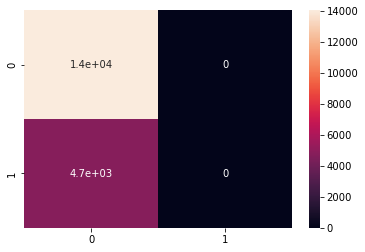

In [78]:
sns.heatmap(Confusion_score, annot = True)

### Using Decision Tree

In [1]:
# import the decisiontree classifier model
from sklearn.tree import DecisionTreeClassifier

In [2]:
#the object for model
model_dic = DecisionTreeClassifier()
model_dic

DecisionTreeClassifier()

In [81]:
#Splitting the dataset into train and test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [82]:
#Fitting the dataset 
model_fit = model_dic.fit(x_train, y_train)
model_fit

DecisionTreeClassifier()

In [83]:
#Checking the accuracy of our model
model_dic.score(x_test, y_test)

0.7496713214653733

### Using RandomForest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier
#Call the object model
model_r = RandomForestClassifier(n_estimators = 60, random_state = 40, n_jobs = - 1, oob_score = True)
model_r

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=40)

In [85]:
#Fitting the data 
model_fit = model_r.fit(x_train, y_train)
model_fit

RandomForestClassifier(n_estimators=60, n_jobs=-1, oob_score=True,
                       random_state=40)

In [86]:
#Checking the accuracy of the model
model_r.score(x_test, y_test)

0.7476459510357816

### Conclusion: This dataset has limitations. For instance,  there's no available symptoms to do a prediction to know if a patient has a particlar disease or not else it would have enhance the performance of our model.